In [1]:
import statsmodels.api as sm
import numpy as np

Generate random numbers as a basis for the analysis. And check that there is no autocorrelation present

In [18]:
eps = np.random.normal(size = 1000)

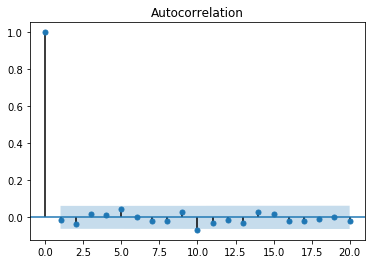

In [20]:
# dev_null assignment is a workoround
# otherwise the plot is displayed twice
dev_null = sm.graphics.tsa.plot_acf(eps,lags = 20)

Generate an AR(1) process with 0.5 coefficient. And plot acf and pacf. The autoregressive
nature of the problem causes the acf to decay only slowly, making it hard to analyze the pattern.
The pacf plot on the other hand clearly indicates a autocorrelation with lag 1.

In [32]:
ar = np.zeros_like(eps)
p = 0.8
for (i,curr_e) in enumerate(eps):
    if (i==0):
        ar[i]  = curr_e
    else:
        ar[i] = p*ar[i-1]+ curr_e
    

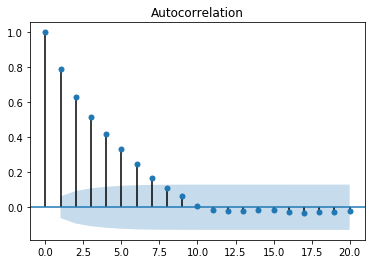

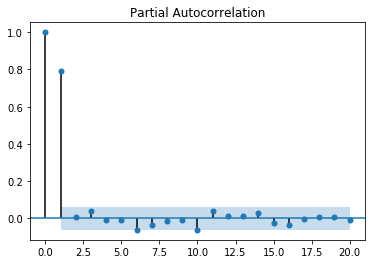

In [33]:
dev_null = sm.graphics.tsa.plot_acf(ar,lags = 20)
dev_null = sm.graphics.tsa.plot_pacf(ar,lags = 20)

We now show another example using an AR(2) model with coefficients $p1 = 0.9$ and $p2 = -0.2$. From the acf it is difficult to tell how exactly the model differs from the AR(1) model. From the pacf plot on the other hand it is easy to see the additional lag 2 correlation.

In [48]:
ar2 = np.zeros_like(eps)
p1 = 0.9
p2 = -0.2
for (i,curr_e) in enumerate(eps):
    if (i==0):
        ar2[i]  = curr_e
    elif (i==1):
        ar2[i] = p1*ar2[i-1] + curr_e
    else:
        ar2[i] = p1*ar2[i-1]+p2*ar2[i-2] + curr_e
    

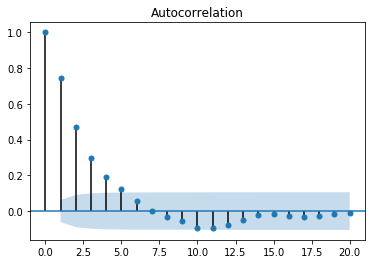

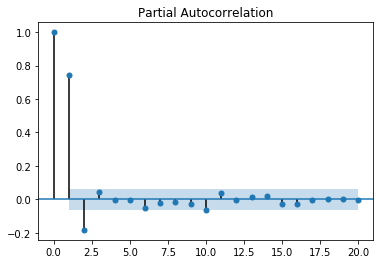

In [49]:
dev_null = sm.graphics.tsa.plot_acf(ar2,lags=20)
dev_null = sm.graphics.tsa.plot_pacf(ar2,lags=20)

### Different kinds of Seasonal patters
There are different kinds of seasonal patterns. Namely deterministic and random ones. Depending on the type differencing as a tool to deal with them has a different effect.

#### Deterministic pattern

In [64]:
seasonal_pattern = eps + np.sin(np.arange(len(eps))*2*np.pi/10)

In [77]:
def lagDiff(series,lag):
    newLength = len(series) - lag
    newSeries = np.zeros(newLength)
    for i in range(newLength):
        newSeries[i] =  series[i+lag] - series[i]
    return newSeries

Differencing for deterministic patterns introduces additional autocorrelation! In order to avoid this issue one should consider using other methods for fitting the deterministic seasonal pattern.

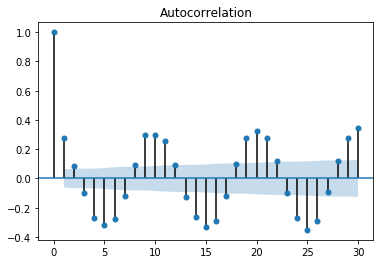

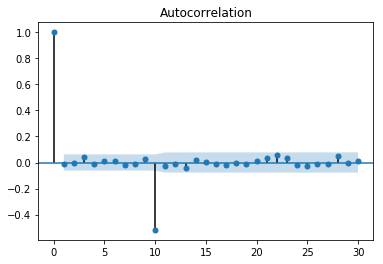

In [92]:
dev_null = sm.graphics.tsa.plot_acf(seasonal_pattern,lags = 30)
dev_null = sm.graphics.tsa.plot_acf(lagDiff(seasonal_pattern,lag=10),lags = 30)

#### Random Seasonal pattern
On the other hand there might be a random seasonal pattern in the form of a random walk, i.e.
$$ r_{i+\mathrm{season~length}} = r_i + \epsilon + \mathrm{other~model~components}$$

In this case differencing is well suited to remove the seasonal drift.

In [112]:
seasonal_random_walk = np.zeros_like(eps)
p = 0.0
for (i,curr_e) in enumerate(eps):
    if (i==0):
        seasonal_random_walk[i]  = curr_e
    elif (i<10):
        seasonal_random_walk[i] = p*seasonal_random_walk[i-1] + curr_e
    else:
        seasonal_random_walk[i] = p*seasonal_random_walk[i-1] + seasonal_random_walk[i-10] + curr_e

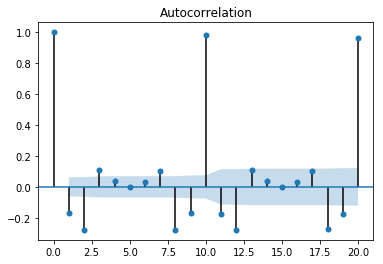

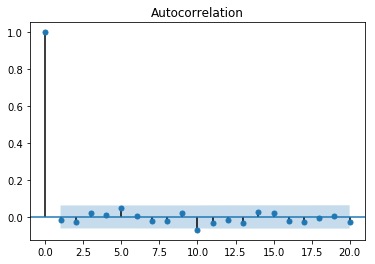

In [113]:
dev_null = sm.graphics.tsa.plot_acf(seasonal_random_walk,lags=20)
dev_null = sm.graphics.tsa.plot_acf(lagDiff(seasonal_random_walk,10),lags=20)

In practice it might not always be clear weather the seasonality is deterministic or a random drift and one might end up trying different methods.